In [1]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv('u.data', sep='\t', names='user_id item_id rating timestamp'.split())

In [15]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [16]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [17]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
#movies with most number of ratings
df.groupby('title').count().sort_values('item_id',ascending = False).head()

,user_id,item_id,rating,timestamp
title,,,,
Star Wars (1977),584,584,584,584
Contact (1997),509,509,509,509
Fargo (1996),508,508,508,508
Return of the Jedi (1983),507,507,507,507
Liar Liar (1997),485,485,485,485


In [26]:
#movies with most ratings
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [28]:
#dataframe with average ratings
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [32]:
#new column 'number of ratings' to the dataframe 'ratings'
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


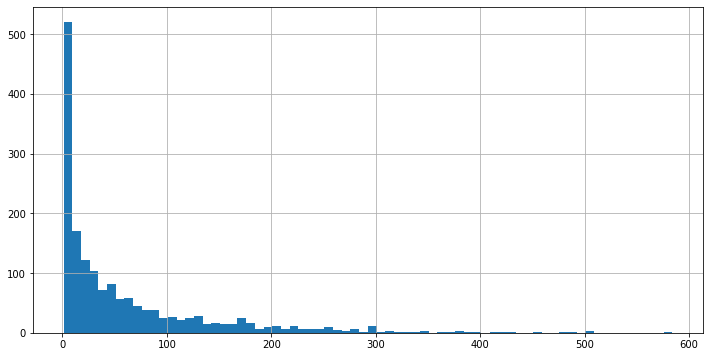

In [36]:
#number of ratings visualization 
plt.figure(figsize = (12,6))
ratings['num of ratings'].hist(bins = 70)

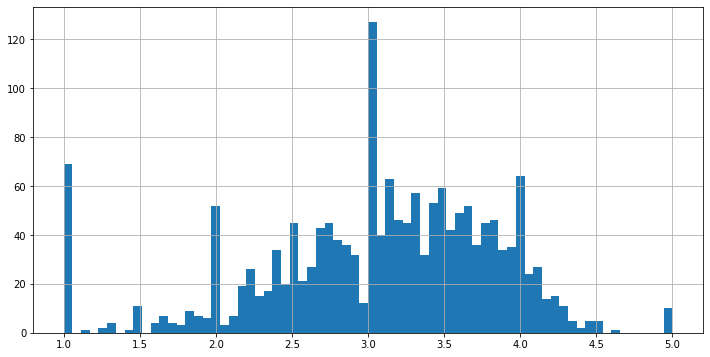

In [40]:
#ratings visualization
plt.figure(figsize=(12,6))
ratings['rating'].hist(bins=70)

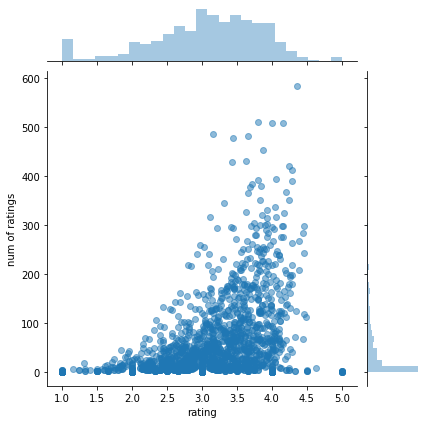

In [41]:
#scatter plot: number of ratings vs rating 
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [45]:
#Dataframe for moviename vs user_id
moviemat = pd.pivot_table(data = df,values='rating',index='user_id',columns='title')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
ratings.sort_values(by = 'num of ratings', ascending = False)['rating'].head()

title
Star Wars (1977)             4.359589
Contact (1997)               3.803536
Fargo (1996)                 4.155512
Return of the Jedi (1983)    4.007890
Liar Liar (1997)             3.156701
Name: rating, dtype: float64

In [66]:
#movies similar to 'Star Wars (1977)'
starwars_1977 = moviemat['Star Wars (1977)']
sratwars_1977_similar = pd.DataFrame(moviemat.corrwith(starwars_1977), columns = ['Correlation'])
sratwars_1977_similar = sratwars_1977_similar.join(ratings['num of ratings'])
sratwars_1977_similar[sratwars_1977_similar['num of ratings']>200].sort_values('Correlation', ascending = False).head(10)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
L.A. Confidential (1997),0.319065,297
E.T. the Extra-Terrestrial (1982),0.303619,300
Batman (1989),0.289344,201


In [71]:
#movies similar to liar liar
liarliar_1977 = moviemat['Liar Liar (1997)']
liarliar_1977_similar = pd.DataFrame(moviemat.corrwith(liarliar_1977), columns= ['Correlation'])
liarliar_1977_similar = liarliar_1977_similar.join(ratings['num of ratings'])
liarliar_1977_similar[liarliar_1977_similar['num of ratings']>200].sort_values('Correlation', ascending = False).head(10)

C:\Users\PC\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\PC\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Indiana Jones and the Last Crusade (1989),0.414427,331
Top Gun (1986),0.405720,220
Back to the Future (1985),0.378028,350
Jurassic Park (1993),0.370770,261
"Saint, The (1997)",0.362803,316
Field of Dreams (1989),0.360339,212
"Shawshank Redemption, The (1994)",0.354533,283
Aladdin (1992),0.354506,219
